In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env

import wrangle

## 1. Acquire customer_id, monthly_charges, tenure, and total_charges from the telco_churn database for all customers with a 2-year contract.

In [2]:
df = wrangle.get_telco_data(cached=False)

In [3]:
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.8
2,0016-QLJIS,90.45,65,5957.9
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


## 2. Using your acquired Telco data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaningful; remember to document your process and decisions using markdown and code commenting where helpful.

In [26]:
# check number of rows and columns in df
df.shape

(1695, 4)

In [27]:
# Display readable summary statistics for numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
monthly_charges,1695.0,60.770413,34.678865,18.4,24.025,64.35,90.45,118.75
tenure,1695.0,56.735103,18.209363,0.0,48.000,64.00,71.00,72.00


> Why is total_charges not showing up? Let's find out!

In [28]:
# check data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   tenure           1695 non-null   int64  
 3   total_charges    1695 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 53.1+ KB


**Running `.info()` shows that total_charges is an object column instead of a float. This is why it does not show in when running summary statistics.**

#### Acquire and Summarize Takeaways

- No null values
- `customer_id` might not be super useful
- `total_charges` should be converted to float
- `total_charges` must have an odd value leading it to be coerced into an object dtype

## Prepare the Data

In [11]:
df.isnull().sum()

customer_id        0
monthly_charges    0
tenure             0
total_charges      0
dtype: int64

In [12]:
df.isnull().any()

customer_id        False
monthly_charges    False
tenure             False
total_charges      False
dtype: bool

In [67]:
# find odd value in total_charges
df.total_charges.value_counts(dropna=False)

844.45     2
5682.25    2
1110.05    2
7334.05    2
5714.20    2
          ..
641.35     1
7542.25    1
1715.15    1
1281.25    1
400.00     1
Name: total_charges, Length: 1687, dtype: int64

**10 rows in `total_charges` contain empty strings**

#### What do we do with the missing data

10 rows is not a lot of missing data so we can drop it but before doing so, let's investigate `total_charges` further.

In [15]:
df[df.total_charges==' ']

,customer_id,monthly_charges,tenure,total_charges
234,1371-DWPAZ,56.05,0,
416,2520-SGTTA,20.00,0,
453,2775-SEFEE,61.90,0,
505,3115-CZMZD,20.25,0,
524,3213-VVOLG,25.35,0,
678,4075-WKNIU,73.35,0,
716,4367-NUYAO,25.75,0,
726,4472-LVYGI,52.55,0,
941,5709-LVOEQ,80.85,0,
1293,7644-OMVMY,19.85,0,


Since all customers who have `total_charges` empty show a 0 tenure and have `monthly_charges` it is likely they are new customers and have not completed their first month with Telco yet. Let's double check to see if any other rows have tenure of 0.

In [16]:
df[df.tenure==0]

,customer_id,monthly_charges,tenure,total_charges
234,1371-DWPAZ,56.05,0,
416,2520-SGTTA,20.00,0,
453,2775-SEFEE,61.90,0,
505,3115-CZMZD,20.25,0,
524,3213-VVOLG,25.35,0,
678,4075-WKNIU,73.35,0,
716,4367-NUYAO,25.75,0,
726,4472-LVYGI,52.55,0,
941,5709-LVOEQ,80.85,0,
1293,7644-OMVMY,19.85,0,


**There are only 10 rows with `tenure` = 0 which confirms our inital belief that these are new customers.**


We can replace the `total_charges` with their `monthly_charges` since they will be the same.

In [33]:
# Before we can use fillna we need to convert the empty string in total_charges to nan values
df.total_charges = df.total_charges.replace(' ', np.nan)

# now we can fill in the nan values with monthly charges
df.total_charges = df.total_charges.fillna(value=df.monthly_charges)

In [34]:
# here we can verify that the total charges values have been filled to be the same as monthly charges
df[df.tenure==0]

,customer_id,monthly_charges,tenure,total_charges
234,1371-DWPAZ,56.05,0,56.05
416,2520-SGTTA,20.00,0,20
453,2775-SEFEE,61.90,0,61.9
505,3115-CZMZD,20.25,0,20.25
524,3213-VVOLG,25.35,0,25.35
678,4075-WKNIU,73.35,0,73.35
716,4367-NUYAO,25.75,0,25.75
726,4472-LVYGI,52.55,0,52.55
941,5709-LVOEQ,80.85,0,80.85
1293,7644-OMVMY,19.85,0,19.85


### Convert Data Types

Let's convert total_charges data type to float now.

In [36]:
# change dtype of column and verify
df.total_charges = df.total_charges.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   tenure           1695 non-null   int64  
 3   total_charges    1695 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 53.1+ KB


When running `.describe()`, we should now see `total_charges` listed since we have converted it to a numeric type.

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
monthly_charges,1695.0,60.770413,34.678865,18.40,24.025,64.35,90.45,118.75
tenure,1695.0,56.735103,18.209363,0.00,48.000,64.00,71.00,72.00
total_charges,1695.0,3707.191504,2579.150775,19.85,1269.675,3593.80,5988.80,8672.45


## Visualize Distributions

We can plot histograms and/or boxplots to see the distributions of single variables and check for skewness, outliers, and unit scales. *Note, we don't have to split our data before exploring single variables. We DO have to split our data before performing bi- and multi-variate exploration.*

In [50]:
viz_df=df.drop(columns=['customer_id'])

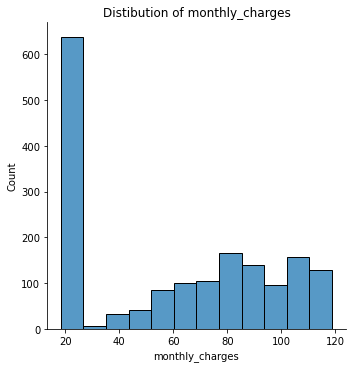

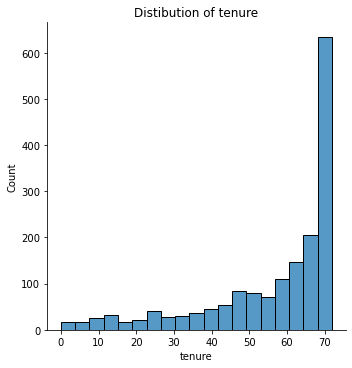

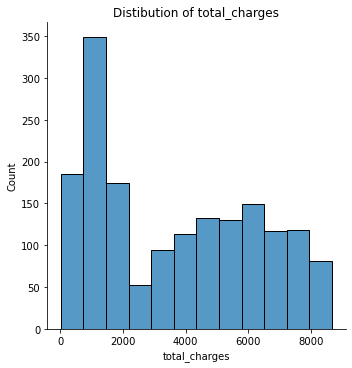

In [54]:
# plots all variables except customer_id in bins of 10
for col in viz_df:
    sns.displot(x=col, data=viz_df)
    plt.title('Distibution of ' + col)
    plt.show()


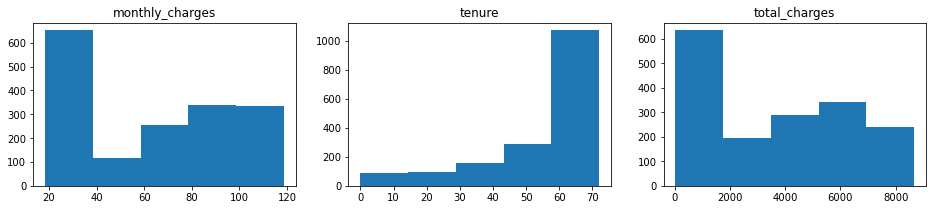

In [55]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['monthly_charges', 'tenure', 'total_charges']

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,3, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    df[col].hist(bins=5)
    
    # Hide gridlines.
    plt.grid(False)

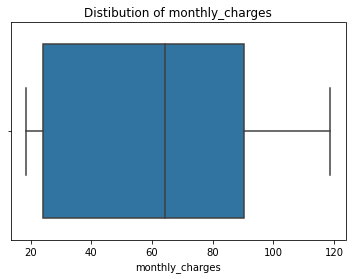

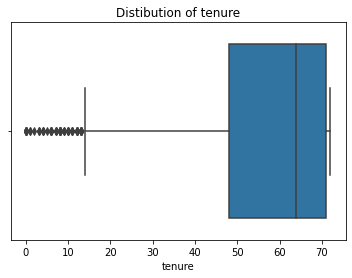

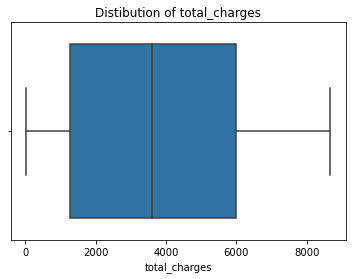

In [65]:
# We don't want to plot the `customer_id` column.

for col in viz_df:    
    sns.boxplot(x=col, data=viz_df)
    plt.title('Distibution of ' + col)
    plt.show()


#### Distribution Takeaways

- More customers in the lower range (less than median) of monthly charges
- median tenure is very close to max tenure
- total charges have a very big range

### 3. End with a wrangle.py file that contains the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe with no missing values. Name your final function wrangle_telco.

In [4]:
# call the wrangle_telco function from wrangle.py file

telco_df = wrangle.wrangle_telco(df)
    

There are no duplicate rows in your dataset.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   tenure           1695 non-null   int64  
 3   total_charges    1695 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 53.1+ KB
None


**With the `.info()` we can see that `total_charges` is now a float and there are no duplicate rows in the data.**